In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [4]:
df.dtypes

Car Model        object
Mileage           int64
Sell Price($)     int64
Age(yrs)          int64
dtype: object

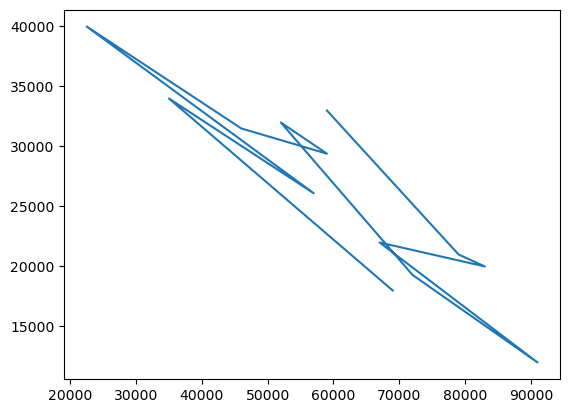

In [5]:
plt.plot(df['Mileage'],df['Sell Price($)'])

In [6]:
d1 = pd.get_dummies(df['Car Model'])
d1

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [7]:
d1 = d1.replace({True:'1',False:'0'})

In [8]:
final = pd.concat([df,d1],axis = 'columns')

In [9]:
final

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [10]:
final.drop(['Car Model','Mercedez Benz C class'],axis='columns',inplace=True)

In [11]:
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [12]:
from sklearn.linear_model import LinearRegression
reg  = LinearRegression()

In [13]:
reg.fit(final[['Mileage','Age(yrs)','Audi A5','BMW X5']],final['Sell Price($)'])

LinearRegression()

In [14]:
reg.predict([[45000,4,0,0]])

array([36991.31721061])

In [15]:
reg.score(final[['Mileage','Age(yrs)','Audi A5','BMW X5']],final['Sell Price($)'])

0.9417050937281083

In [16]:
reg.predict([[86000,7,0,1]])

array([11080.74313219])